<a href="https://colab.research.google.com/github/bchanyoo/NLP/blob/main/NLP%20Wikidocs_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import SimpleRNN, LSTM, Bidirectional

In [2]:
train_X = [[0.1, 4.2, 1.5, 1.1, 2.8], [1.0, 3.1, 2.5, 0.7, 1.1], [0.3, 2.1, 1.5, 2.1, 0.1], [2.2, 1.4, 0.5, 0.9, 1.1]]
print(np.shape(train_X))
#단어 벡터 차원은 5, 문장의 길이가 4인 경우.

(4, 5)


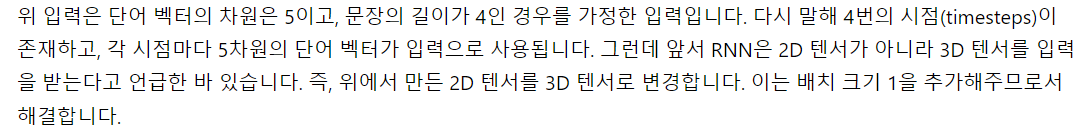

In [3]:
train_X = [[[0.1, 4.2, 1.5, 1.1, 2.8], [1.0, 3.1, 2.5, 0.7, 1.1], [0.3, 2.1, 1.5, 2.1, 0.1], [2.2, 1.4, 0.5, 0.9, 1.1]]]
train_X = np.array(train_X, dtype=np.float32)
print(train_X.shape)


(1, 4, 5)


In [4]:
rnn = SimpleRNN(3) #은닉 상태의 크기를 3.
hidden_state = rnn(train_X)
print('hidden state {}, shape : {}'.format(hidden_state, hidden_state.shape))

hidden state [[ 0.21175008 -0.5272839  -0.9170334 ]], shape : (1, 3)


In [5]:
rnn = SimpleRNN(3, return_sequences=True) #은닉 상태의 크기를 3.
hidden_state = rnn(train_X)
print('hidden state {}, shape : {}'.format(hidden_state, hidden_state.shape))

hidden state [[[ 0.16536856 -0.998457    0.28617758]
  [ 0.38919505 -0.9958627   0.9653221 ]
  [ 0.7377102  -0.983561    0.9577197 ]
  [-0.94944793 -0.9529303   0.97068095]]], shape : (1, 4, 3)


In [6]:
#LSTM, return-seq이 False일 때는 SimpleRNN과 마찬가지로 마지막 시점의 은닉 상태만 반환함.

lstm = LSTM(3, return_sequences = False, return_state = True)
hidden_state, last_state, last_cell_state = lstm(train_X)

print('hidden state : {}, shape: {}'.format(hidden_state, hidden_state.shape))
print('last hidden state : {}, shape: {}'.format(last_state, last_state.shape))
print('last cell state : {}, shape: {}'.format(last_cell_state, last_cell_state.shape))

hidden state : [[-0.0708349   0.08277059 -0.5381928 ]], shape: (1, 3)
last hidden state : [[-0.0708349   0.08277059 -0.5381928 ]], shape: (1, 3)
last cell state : [[-0.09024656  0.2832302  -0.6979655 ]], shape: (1, 3)


In [7]:
#LSTM에서 return_sequences = True일 때, 두번째 출력값이 마지막 은닉상태, 세번째 출력값이 마지막 셀 상태
#return_sequences가 true이므로 첫번째 출력값은 모든 시점의 은닉 상태

lstm = LSTM(3, return_sequences=True, return_state=True)
hidden_states, last_hidden_state, last_cell_state = lstm(train_X)

print('hidden states : {}, shape: {}'.format(hidden_states, hidden_states.shape))
print('last hidden state : {}, shape: {}'.format(last_hidden_state, last_hidden_state.shape))
print('last cell state : {}, shape: {}'.format(last_cell_state, last_cell_state.shape))

hidden states : [[[-0.22326013  0.15240237  0.18858579]
  [-0.13391587 -0.0242538   0.17614265]
  [-0.2229847  -0.0308521   0.52926457]
  [-0.16881795 -0.02516122  0.40687287]]], shape: (1, 4, 3)
last hidden state : [[-0.16881795 -0.02516122  0.40687287]], shape: (1, 3)
last cell state : [[-0.7552838  -0.06255818  1.1530688 ]], shape: (1, 3)


In [8]:
k_init = tf.keras.initializers.Constant(value=0.1)
b_init = tf.keras.initializers.Constant(value=0)
r_init = tf.keras.initializers.Constant(value=0.1)

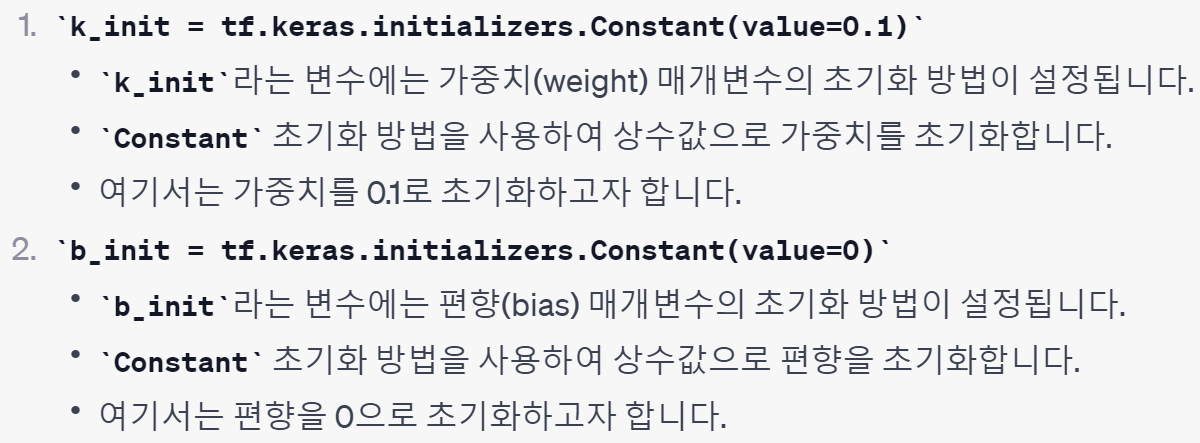
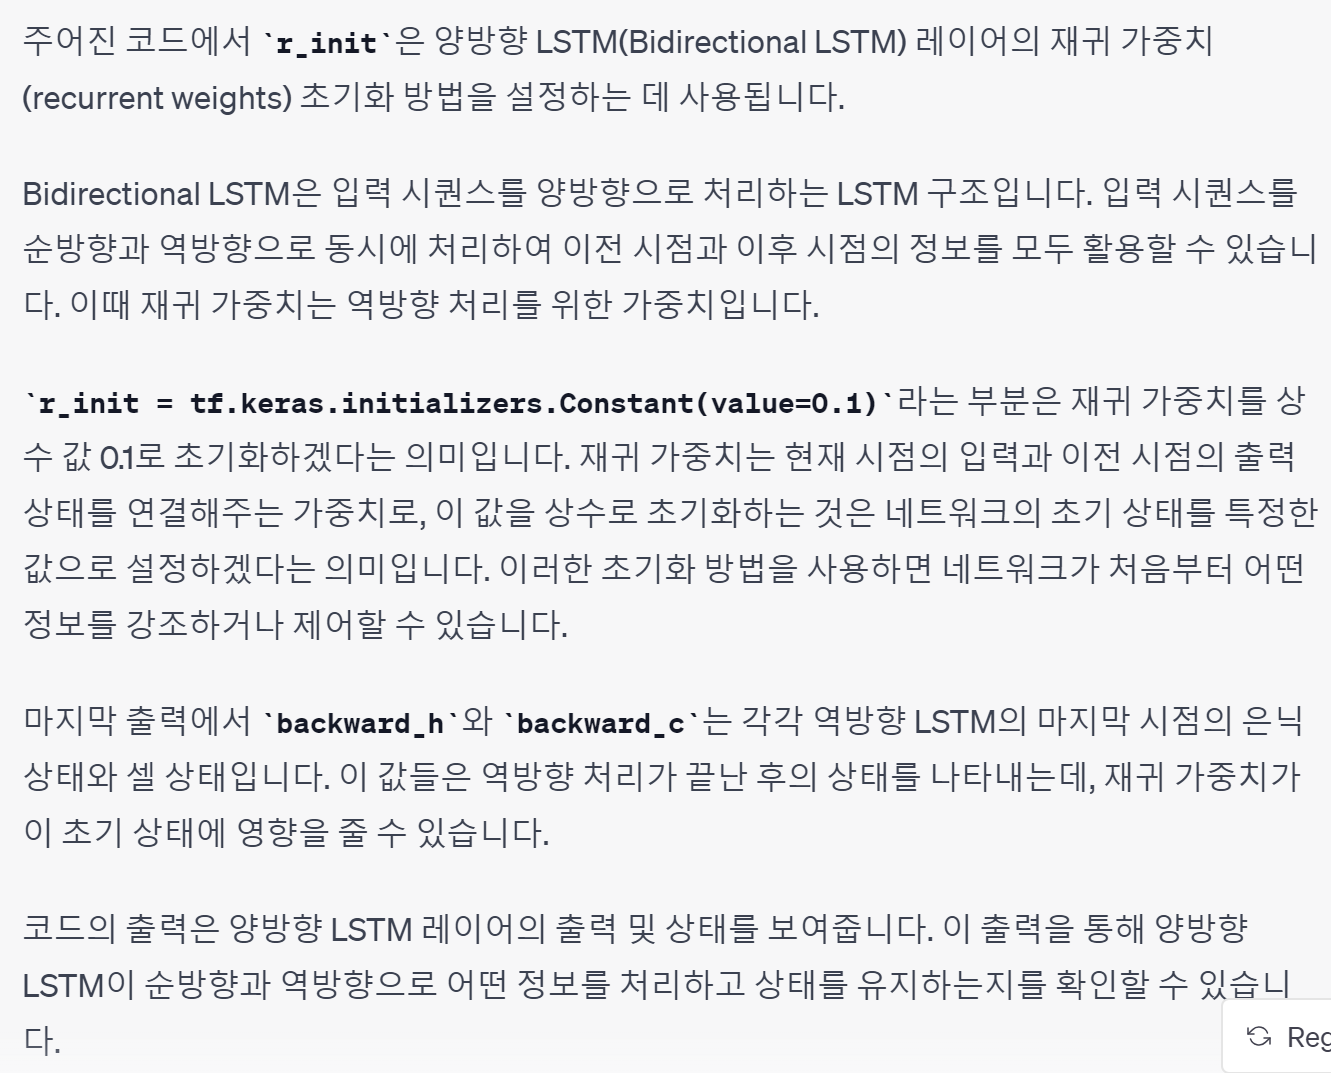

In [9]:
bilstm = Bidirectional(LSTM(3, return_sequences=False, return_state=True, \
                            kernel_initializer=k_init, bias_initializer=b_init, recurrent_initializer=r_init))
hidden_states, forward_h, forward_c, backward_h, backward_c = bilstm(train_X)

print('hidden states : {}, shape: {}'.format(hidden_states, hidden_states.shape))
print('forward state : {}, shape: {}'.format(forward_h, forward_h.shape))
print('backward state : {}, shape: {}'.format(backward_h, backward_h.shape))


hidden states : [[0.6303139  0.6303139  0.6303139  0.70387346 0.70387346 0.70387346]], shape: (1, 6)
forward state : [[0.6303139 0.6303139 0.6303139]], shape: (1, 3)
backward state : [[0.70387346 0.70387346 0.70387346]], shape: (1, 3)


In [10]:
bilstm = Bidirectional(LSTM(3, return_sequences=True, return_state=True, \
                            kernel_initializer=k_init, bias_initializer=b_init, recurrent_initializer=r_init))
hidden_states, forward_h, forward_c, backward_h, backward_c = bilstm(train_X)


In [11]:
print('hidden states : {}, shape: {}'.format(hidden_states, hidden_states.shape))
print('forward state : {}, shape: {}'.format(forward_h, forward_h.shape))
print('backward state : {}, shape: {}'.format(backward_h, backward_h.shape))


hidden states : [[[0.35906476 0.35906476 0.35906476 0.70387346 0.70387346 0.70387346]
  [0.5511133  0.5511133  0.5511133  0.5886358  0.5886358  0.5886358 ]
  [0.5911575  0.5911575  0.5911575  0.39516988 0.39516988 0.39516988]
  [0.6303139  0.6303139  0.6303139  0.2194224  0.2194224  0.2194224 ]]], shape: (1, 4, 6)
forward state : [[0.6303139 0.6303139 0.6303139]], shape: (1, 3)
backward state : [[0.70387346 0.70387346 0.70387346]], shape: (1, 3)
